In [4]:
#!pip install control
#!pip install tbcontrol

In [5]:
import control as ct
from tbcontrol.symbolic import routh
import sympy
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

k,s = sympy.symbols('k s')

# Etapas do LGR


Dados das questões

In [6]:
# Caso nao saiba/queira calcular as raizes na mao
eq = sympy.Poly((s**2+4*s+5),s)
print(sympy.roots(eq))

del eq

{-2 - I: 1, -2 + I: 1}


In [7]:
# Escrever Gs e Hs e achar o Ps
GsHs_numerador = 1
GsHs_denominador = s*(s**2+4*s+5)

polos = np.array([0,-2-1.j,-2+1.j], dtype=np.complex64)

if GsHs_numerador == 1:
    zeros = np.empty((0,0))
else:
    zeros = np.array([-1], dtype=np.complex64)

# Caso NÃO tenha zeros, usar este vetor

si = -0.2968-4.329j

## 1. Escrever o Polinômio característico

$ 1 + G(s)H(s) = 0$ ou $1 + KP(s)$

<br>

sendo: $P(s) = G(s)H(s)$

In [8]:
display(GsHs_numerador / GsHs_denominador)

1/(s*(s**2 + 4*s + 5))

## 2. Fatorar o polinômio

Fatorar o polinômio para ficar em função de Zeros ($n_z$) e Polos ($n_p$):

<br>

$1 + G(s)H(s) = 1 + K \cdot \frac{\prod_{i=1}^{n_z}(s + z_i)}{\prod_{j=1}^{n_p}(s + p_j)}$

In [9]:
Ps = GsHs_numerador / GsHs_denominador
Ps = sympy.factor(Ps)
display(Ps)

1/(s*(s**2 + 4*s + 5))

## 3. Desenha no plano S os Zeros e Polos


* Polos = X
* Zeros = O

## 4. Desenhar no gráfico as LGR no eixo REAL

* A Direita do Polo/Zero, se tiver número ímpar de polos e zeros, logo aquele trecho é LGR;

* O LGR se situa a esquerda de um número ímpar de polos e zeros.

COLOCAR EXEMPLO


## 5. Determinar o número de lugares separados do LGR

Cada polo deve ir para um Zero, esses zeros podem ser os que estão na equação. Se sobrar Polos sem ligações com Zeros locais, esses polos terão curvas que vão para o Zero no INFINITO.

<br>

* $n_z$ = Número de pólos finitos;
* $n_p$ = Número de zeros finitos;

## 6. O LGR deve ser simétrico em relação ao EIXO REAL

## 7. Calcular os ângulos das assíntotas

* Ponto de encontro das assíntotas $\sigma_A:$

$\sigma_A = \frac{\sum(-p_j) - \sum(-z_i)}{n_p - n_z}$

* Ângulo de cada assíntota $\phi_A$:

$Φ_A = \frac{(2q +1)}{n_p - n_z}180°$

$q = 0,1,2,...,(n_p - n_z - 1)$

In [10]:
sigma_A = (np.sum(polos) - np.sum(zeros)) / (len(polos) - len(zeros))
print(f'Quantidade de assíntotas {(len(polos) - len(zeros))}')
print(f'Sigma_A = {sigma_A} (Ponto de encontro das assintotas)')

phi_A = np.zeros((len(polos)-len(zeros),))

for i in range((len(polos)-len(zeros))):
    phi_A[i] = (2*i+1) / ((len(polos)-len(zeros))) * 180

print(f'phi_a = {phi_A} (Angulos das assintotas)')

Quantidade de assíntotas 3
Sigma_A = (-1.3333333333333333+0j) (Ponto de encontro das assintotas)
phi_a = [ 60. 180. 300.] (Angulos das assintotas)


## 8. Determinar o ponto de saída ou chegada no eixo real

$\frac{dp(s)}{ds} = 0$

Sendo P(s):

$1 + K P(s) = 0$

$K P(s) = -1$

$K = -\frac{1}{P(s)}$, portanto, $p(s) = -\frac{1}{P(s)}$

$\frac{dp(s)}{ds} = \frac{denomiador de P(s)}{numerador de P(s)}$

**Caso não tenha nenhum raiz real, quer dizer que não há ponto de encontro dos polos.**

In [11]:
ps = -1 / Ps
# ps = ps
display(ps.expand())
dps = sympy.factor(sympy.diff(ps.expand(),s))
dps_numerador, dps_denominador = sympy.fraction(dps)

display(dps)

display(sympy.expand(dps_numerador))

raizes = sympy.nroots(dps_numerador)

print(raizes)

-s**3 - 4*s**2 - 5*s

-(s + 1)*(3*s + 5)

-3*s**2 - 8*s - 5

[-1.66666666666667, -1.00000000000000]


## 9. Determinar o ponto que cruza o eixo Imaginário

Caso desconfie que a LGR cruza o eixo imaginário, deve-se utilizar do Routh-Houwitz para detrminar o ponto de cruzamento a partir de um $K_{critico}$.

In [12]:
numerador_RouthHurwitz = GsHs_numerador
denominador_RouthHurwitz = GsHs_denominador

PolyCaracteristico = sympy.Poly(denominador_RouthHurwitz + k*numerador_RouthHurwitz,s)

display(PolyCaracteristico)

Poly(s**3 + 4*s**2 + 5*s + k, s, domain='ZZ[k]')

In [13]:
routh(PolyCaracteristico)

Matrix([
[      1, 5],
[      4, k],
[5 - k/4, 0],
[      k, 0]])

In [14]:
Matriz_RouthHourwitz= routh(PolyCaracteristico)

print(sympy.solve([e > 0 for e in routh(PolyCaracteristico)[:, 0]], k))

Kcrit = sympy.solve(Matriz_RouthHourwitz[3,0],k) 
print(Kcrit)
print()

# SUBSTITUI COM A LINHA QUE CORRESPONDE 
# A EQUAÇÃO DE SEGUNDO GRAU
TermoDeSegundoGrau = 72/5*s**2

for i in Kcrit:
    display(sympy.solve(TermoDeSegundoGrau + i))



(0 < k) & (k < 20)
Kcritico = [20]



-2.23606797749979*I

2.23606797749979*I

## 10. Usando a condição de ângulo para saber o ângulo de saída dos polos complexos e de chegada para Zeros complexos

In [15]:
# Fazer exemplo

## 11. Critério de ângulo de fase

Serve para verificar se o ponto em questão, pertece ou não a LGR:

$/\underline{{G(s)H(s)}} |_{s = s_i} = \sum (\theta_i) - \sum (\phi_j) = 180° \pm q360° $

In [16]:
theta_sum = 0
phi_sum = 0
CriterioDeAngulo = False

for i in polos:
    theta_sum += np.rad2deg(np.arctan2(si.imag - i.imag, si.real - i.real))
    # print(theta_sum)
# print()

for i in zeros:
    phi_sum += np.rad2deg(np.arctan2(si.imag - i.imag, si.real - i.real))
    # print(phi_sum)
# print()

print(f'ThetaSUM = {theta_sum}')
print(f'PhiSUM = {phi_sum}')

CriterioAngulo = np.abs(theta_sum - phi_sum)

if CriterioAngulo < (180 + 0.2) and CriterioAngulo > (180 - 0.2):
    print(f'DENTRO: Ponto pertence ao LGR: {CriterioAngulo} ')
    CriterioDeAngulo = True
else:
    print(f'FORA: Ponto NAO pertence ao LGR: {CriterioAngulo}')
    CriterioDeAngulo = False

ThetaSUM = -229.1023019612859
PhiSUM = 0
FORA: Ponto NAO pertence ao LGR: 229.1023019612859


## 12. Critério de módulo

Serve para calcular o valor de K na raiz $s_i$:

$|k_iP(s)| = 1$

$K_i = \frac{\prod_{i=1}^{n_p} |(s + p_i)|}{\prod_{j=1}^{n_z} |(s + z_j)|} = 1$

onde $|s+p_i|$ e $|s+z_j|$ são os módulos das distânicias entre a raiz estudada e o polo/zero:

$K_i = \frac{\prod_{i=1}^{n_p}A_i}{\prod_{j=1}^{n_p}B_j} = 1$

In [17]:
if CriterioDeAngulo:
    Asum = 1
    Bsum = 1

    for i in polos:
        Asum *= np.sqrt((si.real-i.real)**2 + (si.imag - i.imag)**2)
        # print(Asum)

    for i in zeros:
        Bsum *= np.sqrt((si.real-i.real)**2 + (si.imag - i.imag)**2)
        # print(Bsum)

    K = Asum / Bsum

    print(f'Valor do parametro K na raiz {si}: {K}')

## Gráfico da LGR

In [18]:
Ps = GsHs_numerador / GsHs_denominador
Ps = sympy.factor(Ps)
display(Ps.expand())

Coeficientes_denominador = np.array(sympy.Poly(GsHs_denominador,s).all_coeffs())
Coeficientes_numerador = np.array(sympy.Poly(GsHs_numerador,s).all_coeffs())

print(Coeficientes_denominador)
print(Coeficientes_numerador)

1/(s**3 + 4*s**2 + 5*s)

[1 4 5 0]
[1]


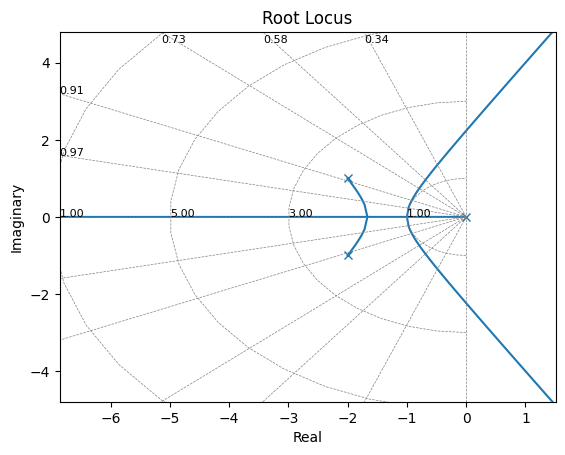

In [19]:
Polos_plot = np.zeros((len(Coeficientes_denominador)))

if len(Coeficientes_numerador) == 1:
    Zeros_plot = np.zeros((len(Coeficientes_numerador)+1))
    Zeros_plot[1] = Coeficientes_numerador[0]
else:
    Zeros_plot = np.zeros((len(Coeficientes_numerador)))

    for i in range(len(Coeficientes_numerador)):
        Zeros_plot[i] = Coeficientes_numerador[i]

for i in range(len(Coeficientes_denominador)):
    Polos_plot[i] = Coeficientes_denominador[i]

# AS DUAS VARIAVEIS ABAIXO SERVEM PARA PLOTAR
# O GRAFICO NA ÚLTIMA CÉLULA
#
# No menor indice do vetor, deve ser colocado
# a constante que acompanha o termo "s" de maior
# grau. TODOS OS TERMOS DEVEM ESTA COM O SINAL TROCADO
# Se o POLO/ZERO for do lado esquerdo do plano S, deve-se
# inverter seu sinal
#
# EXEMPLO: (2s^2 + 4s + 7) / (s^2 + 99s)
# numerador = np.array([2,4,0,7])
# denominador = np.array([1,99,0])
# Zeros_plot = np.array([0,1])
# Polos_plot = np.array([1,12,64,128,0])

GH = ct.TransferFunction(Zeros_plot, Polos_plot)

rlist, klist = ct.rlocus(GH)